# 14 Visualizing Topography and Maps with PyVista

The topography of an area can be visualized in 3D with PyVista and additional maps can also be draped over the topography. 

<img src="../images/tutorial14_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/14_visualizing_topography_and_maps_with_pyvista/'

## Loading the data

A 50 m DEM of the Münsterland Basin is loaded to illustrate the visualizing of topography in PyVista. The data will be used under Datenlizenz Deutschland – Zero – Version 2.0.


In [2]:
import gemgis as gg
import pyvista as pv

mesh = gg.visualization.read_raster(path=file_path + 'DEM50.tif', 
                                    nodata_val=9999.0,
                                    name='Elevation [m]')

mesh

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


StructuredGrid (0x273259e14c0)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	2000, 2800, 1
  N Arrays:	1

## Plotting the data in 2D

In [3]:
import rasterio

dem = rasterio.open(file_path + 'DEM50.tif')


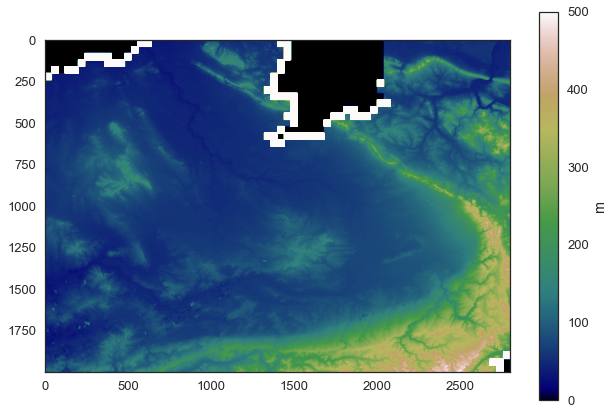

In [4]:
import matplotlib.pyplot as plt

im = plt.imshow(dem.read(1), cmap='gist_earth', vmin=0, vmax=500)
cbar = plt.colorbar(im)
cbar.set_label('m')

## Wrap Mesh by Scalars

The dataset’s points are wrapped by a point data scalars array’s values.

In [5]:
topo = mesh.warp_by_scalar(scalars="Elevation [m]", factor=15.0)

topo

StructuredGrid (0x27327c217c0)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 7.557e+03
  Dimensions:	2000, 2800, 1
  N Arrays:	1

## Plotting the Mesh

The mesh can then easily be plotted with PyVista

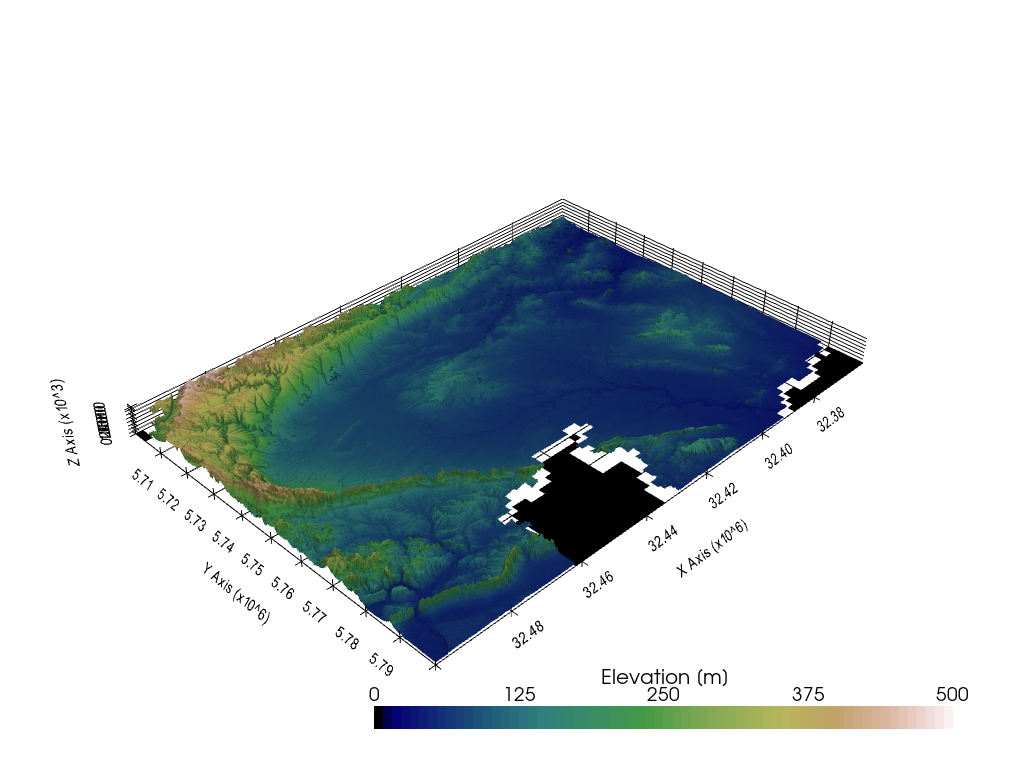

In [6]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)
p.add_mesh(mesh=topo, cmap='gist_earth', scalar_bar_args=sargs, clim=[-0, 500])

p.set_background('white')
p.show_grid(color='black')
p.show()

## Drape Topographic map over Digital Elevation Model

It is also possible to drape a topographic map over the digital elevation model. The map will be loaded from a WMS service which will be introduced in a later tutorial in more detail. In order to make the feature work, the width and the height of both, the map data and the digital elevation model, must be the same!

### Loading the WMS Service



In [7]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:4647', [32320000,32500000, 5690000, 5800000], [2800, 2000], 'image/png')

### Plotting the map data

Text(32405000, 5758000, 'Münster')

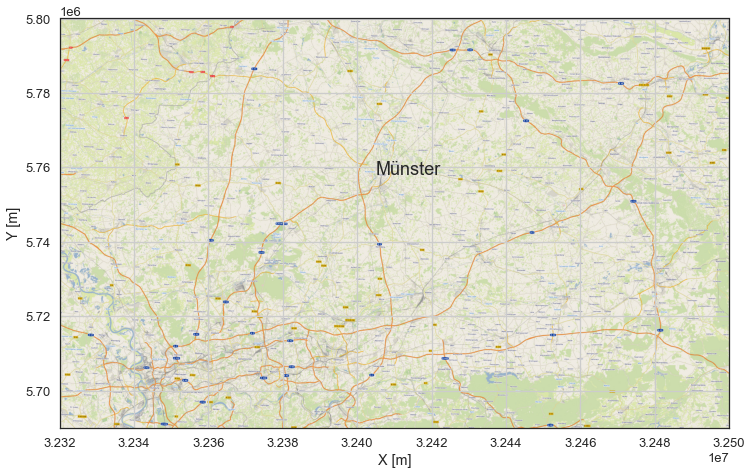

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32320000,32500000, 5690000, 5800000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32405000,5758000, 'Münster', size = 18)

### Converting the array values to RGB values

When downloading the wms_map, a total of three bands are downloaded. These array values need to be converted to RGB values.

In [9]:
wms_map.shape

(2000, 2800, 3)

In [10]:
wms_stacked = gg.visualization.convert_to_rgb(array=wms_map)

wms_stacked[:2]

array([[[ 93,  93, 126],
        [104, 104, 133],
        [227, 227, 234],
        ...,
        [152, 178, 204],
        [160, 188, 201],
        [206, 200, 181]],

       [[247, 246, 248],
        [241, 240, 246],
        [243, 241, 241],
        ...,
        [150, 177, 205],
        [175, 187, 177],
        [232, 228, 219]]], dtype=uint8)

In [11]:
wms_stacked.shape

(2000, 2800, 3)

### Draping the array over the Digital Elevation Model

The map data of the WMS map can be draped over the digital elevation model. 

In [12]:
mesh, texture = gg.visualization.drape_array_over_dem(array=wms_stacked,
                                                      dem=dem)

### Plotting the data in PyVista

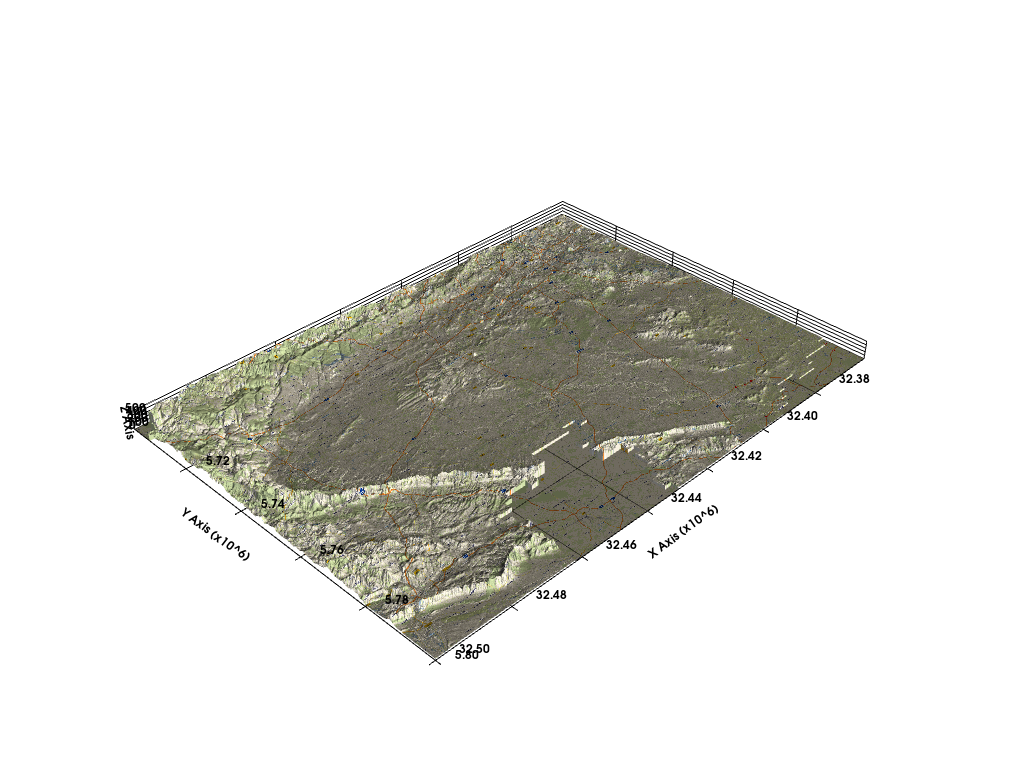

In [13]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)
p.add_mesh(mesh=mesh, cmap='gist_earth', scalar_bar_args=sargs, texture=texture)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()